In [125]:
import sympy as sp
import sympy.physics.mechanics as spm
from sympy.physics.mechanics import dynamicsymbols
import numpy as np

import control as ct

import matplotlib.pyplot as plt

spm.init_vprinting()

# Vehicle Steering

### Create symbolic matrices

In [162]:
L, m, c, g = sp.symbols('L m c g', real=True, positive=True)
k_1, k_2, k_f, r = sp.symbols('k_1 k_2 k_f r')

gamma_ = sp.symbols('gamma_')

A_sym = sp.Matrix([[0, 1], [0, 0]])
B_sym = sp.Matrix([gamma_, 1])

K = sp.Matrix([k_1, k_2]).T

# New dynamics matrix
A_tild_sym = A-(B*K)

# Feedforward control input
u = k_f*r

### Substitute values

In [163]:
#paramaters
gamma = 0.5

A = A_sym 
B = B_sym.subs({gamma_:gamma})

A_tild = A_tild_sym.subs({gamma_:gamma})

### Compute characteristic polynomial

In [164]:
lambda_ = sp.symbols('lambda')

# compute the characterisitic polynomial
charac_polynomial = (A_tild - lambda_*sp.eye(2)).det()

# group common terms in the equation
charac_polynomial =sp.collect(charac_polynomial,lambda_)
charac_polynomial

We know that the secod order systems can be represented in the for $ \lambda^2 + 2\zeta\omega_d\lambda + \omega_d^2 $. Comparing with tht characteristic polynomial, we see that $2\zeta\omega_d = \gamma k_1 + k_2$ and $k_1=\omega_d^2$

### Examine performance for various values of $\zeta$ and $\omega_n$

In [166]:
# controller parameters
omega_n = 0.5
zeta = 0.9

k1 = np.sqrt(omega_n)
k2 = 2*zeta*omega_n - gamma*k1

charac_polynomial_val = charac_polynomial.subs({gamma_:gamma, k_1:k1, k_2:k2})
charac_polynomial_val

In [168]:
# A_tild_val = A_tild.subs({gamma_:gamma, k_1:k1, k_2:k2})

## Analyse performance

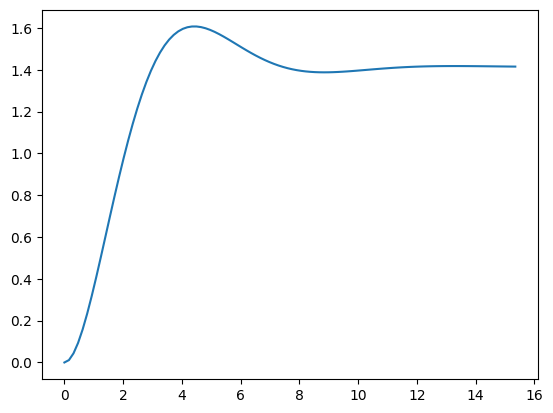

In [169]:
num = [1]
den = [1 ,0.9 , 0.707106781186548]
sys = ct.tf(num, den)

T, yout = ct.step_response(sys)
plt.plot(T, yout)
plt.show()

In [172]:
yout.shape